In [1]:
%matplotlib inline

import math
import numpy as np
from scipy import misc # for vectorized factorial
from scipy import special # for vectorized gamma function
from sympy import symbols, lambdify, \
                  sin, exp, factorial, \
                  gamma, Sum, oo
import matplotlib.pyplot as plt
import seaborn

def plot_f(symbolic_func, iv, xlim=[-5, 5], granularity=1000):
    """Helper function to plot a (univariate) symbolic function.
    Uses np.linspace for an interval over which to
    numerically evaluate the symbolic function.
    """
    
    # `modules` is the priority order of (sympy function -->
    # numeric function) mapping
    # Specifically need scipy's vectorized factorial and gamma
    # to be prioritized over numpy and math
    modules = [{'factorial': misc.factorial},
               {'gamma': special.gamma},
               'numpy', 'math']
    
    f = lambdify(iv, symbolic_func, modules=modules)
    
    x_vals = np.linspace(xlim[0], xlim[1], granularity)
    y_vals = f(x_vals)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(x_vals, y_vals)
    
    plt.show()

You can plot special functions as long as there's a version (in numpy, math, scipy, etc.) that can take in an array.

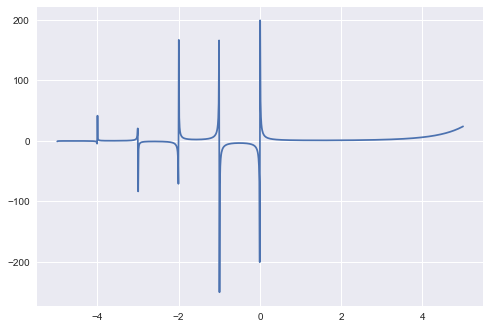

In [2]:
x = symbols('x')

plot_f(gamma(x), x)

You can also plot convergent infinite series. Here's the Taylor series for cosine.

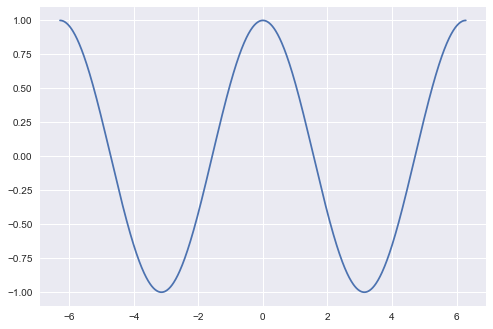

In [3]:
k = symbols('k', integer=True)

cos_taylor = Sum(((-1) ** k) * (x**(2 * k)) / factorial(2 * k),
                 (k, 0, oo)
                ).doit()

plot_f(cos_taylor, x, xlim=[-2 * np.pi, 2 * np.pi])

The next example was inspired by a [Stack Overflow](http://stackoverflow.com/questions/43981075/python-infinite-series-plot-and-re-im-part) question. Actually, it was the original thing I was trying to solve. I'm not sure if or over which regions the proposed function (apparently related to the hypergeometric family) is convergent.

In [4]:
# Divergent series?

nu = 2 # set nu parameter to a constant for 2-D plotting

s = symbols('s')

psi = Sum(((-1)**(k + 1) * s**(k * nu) * gamma(k * nu + 1)) / \
              (gamma(k * nu + 2) * (k * nu + 1)),
          (k, 1, oo)
         ).doit()